## 11. Resumen y Conclusiones

# Modelado de Regresi√≥n - CS:GO Dataset

**Objetivo:** Predecir `RoundStartingEquipmentValue` (valor del equipamiento individual)

**Target:** RoundStartingEquipmentValue (correlaci√≥n m√°xima: 0.923 con TeamStartingEquipmentValue)

**Features v√°lidas:** Equipamiento del equipo, tipo de armas, granadas, contexto del mapa/ronda

---

## 1. Importaci√≥n de Librer√≠as

In [9]:
# Librer√≠as principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn para ML
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
try:
    from catboost import CatBoostRegressor
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False

# Configuraci√≥n de visualizaci√≥n
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)

print("Librer√≠as importadas exitosamente")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(CATBOOST_AVAILABLE)

Librer√≠as importadas exitosamente
Pandas version: 2.2.3
Numpy version: 2.2.6
True


## 2. Carga y Exploraci√≥n de Datos

In [10]:
# Cargar dataset con features
df = pd.read_csv(r"C:\Users\LuisSalamanca\Desktop\Duoc\Machine\csgo-ml\data\02_intermediate\csgo_data_clean.csv")
print(f"Dataset cargado: {df.shape}")

# Informaci√≥n b√°sica
print(f"\nInformaci√≥n del dataset:")
print(f"- Filas: {df.shape[0]:,}")
print(f"- Columnas: {df.shape[1]}")

# Mostrar primeras filas
print(f"\nPrimeras 5 filas:")
display(df.head())

print(f"\nTipos de datos resumen:")
print(df.dtypes.value_counts())

Dataset cargado: (79154, 32)

Informaci√≥n del dataset:
- Filas: 79,154
- Columnas: 32

Primeras 5 filas:


Map       Team  InternalTeamId  RoundId  RoundWinner  MatchWinner  \
0  de_inferno  Terrorist               1        1        False         True   
1  de_inferno  Terrorist               1        1        False         True   
2  de_inferno  Terrorist               1        1        False         True   
3  de_inferno  Terrorist               1        1        False         True   
4  de_inferno  Terrorist               1        1        False         True   

   Survived  RLethalGrenadesThrown  RNonLethalGrenadesThrown  \
0     False                      0                         4   
1     False                      0                         0   
2     False                      0                         0   
3     False                      0                         0   
4      True                      1                         1   

   PrimaryAssaultRifle  PrimarySniperRifle  PrimaryHeavy  PrimarySMG  \
0                  0.0                 0.0           0.0         0.0   
1                  0.0                 0.0           0.0         0.0   
2                  0.0                 0.0           0.0         0.0   
3                  0.0                 0.0           0.0         0.0   
4                  0.0                 0.0           0.0         0.0   

   PrimaryPistol  RoundKills  RoundAssists  RoundHeadshots  RoundFlankKills  \
0              1           0             0               0                0   
1              1           0             0               0                0   
2              1           0             0               0                0   
3              1           0             0               0                0   
4              1           0             0               0                0   

   RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                          750                        4400           0   
1                          800                        4400           0   
2                         1000                        4400           0   
3                          850                        4400           0   
4                         1000                        4400           0   

   MatchFlankKills  MatchAssists  MatchHeadshots  Team_encoded  \
0                0             0               0             1   
1                0             0               0             1   
2                0             0               0             1   
3                0             0               0             1   
4                0             0               0             1   

   RoundWinner_encoded  MatchWinner_encoded  Survived_encoded  Map_de_dust2  \
0                    0                    1                 0         False   
1                    0                    1                 0         False   
2                    0                    1                 0         False   
3                    0                    1                 0         False   
4                    0                    1                 1         False   

   Map_de_inferno  Map_de_mirage  Map_de_nuke  
0            True          False        False  
1            True          False        False  
2            True          False        False  
3            True          False        False  
4            True          False        False


Tipos de datos resumen:
int64      19
bool        7
float64     4
object      2
Name: count, dtype: int64


## 3. An√°lisis de Correlaci√≥n y Selecci√≥n de Features

Features candidatas disponibles: 5

TARGET: MatchKills
- Valores √∫nicos: 41
- Rango: 0 - 41
- Media: 9

TOP 15 CORRELACIONES CON MatchKills:
 1. MatchHeadshots                     : 0.831
 2. MatchAssists                       : 0.510
 3. RoundKills                         : 0.183
 4. TeamStartingEquipmentValue         : 0.179
 5. RoundHeadshots                     : 0.112

Features con correlaci√≥n > 0.15: 4


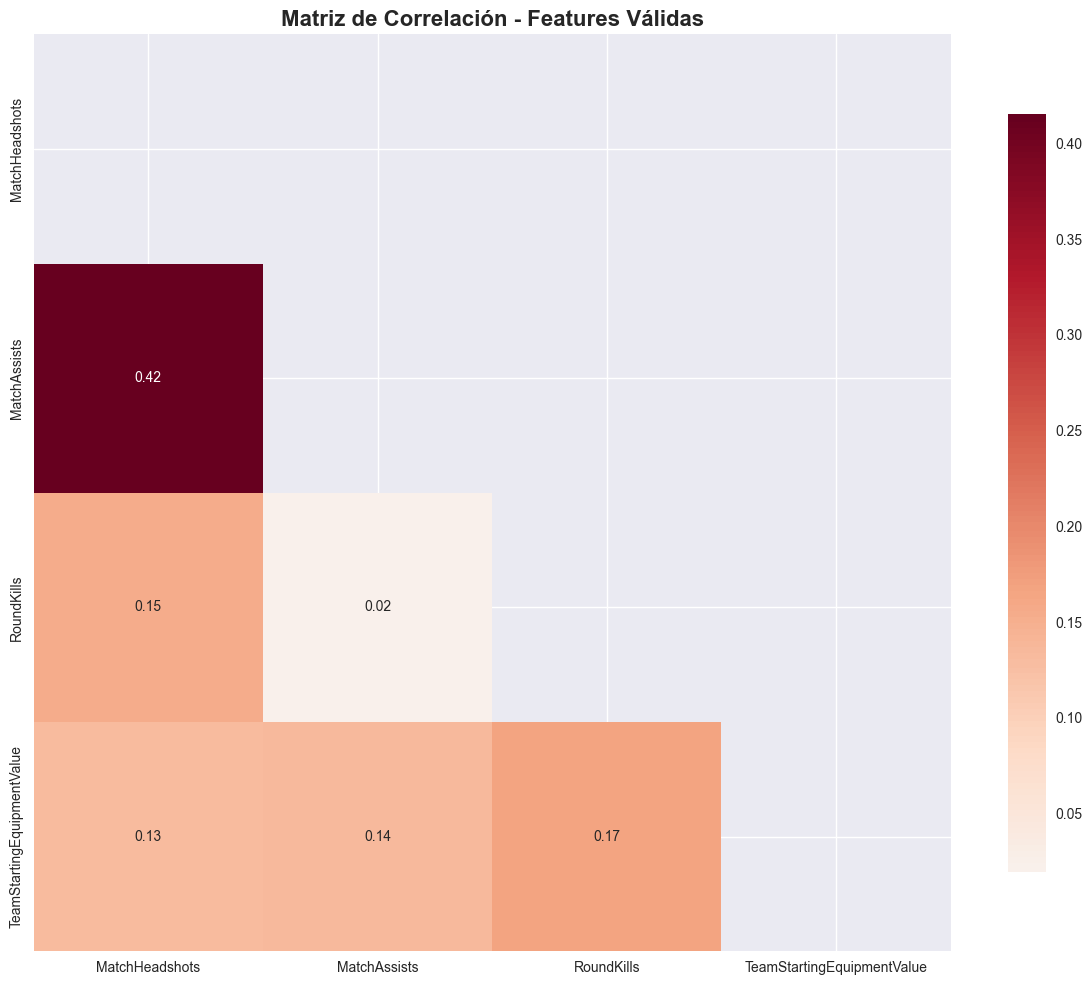


No hay correlaciones muy altas entre features ‚úì

FEATURES SELECCIONADAS PARA MODELADO: 4
 1. MatchHeadshots                     : r = 0.831
 2. MatchAssists                       : r = 0.510
 3. RoundKills                         : r = 0.183
 4. TeamStartingEquipmentValue         : r = 0.179

No hay valores nulos en las features seleccionadas ‚úì
Features realmente usadas para correlaci√≥n: ['RoundKills', 'RoundHeadshots', 'TeamStartingEquipmentValue', 'MatchAssists', 'MatchHeadshots']

Max correlaci√≥n alcanzada: 0.831
‚úÖ EXCELENTE para regresi√≥n - correlaciones altas


In [11]:
# Selecci√≥n de features V√ÅLIDAS para regresi√≥n (sin data leakage)
target = 'MatchKills'

# Features v√°lidas disponibles ANTES del resultado
valid_features = [
    'RoundKills',
    'RoundHeadshots',
    'TeamStartingEquipmentValue', 'MatchAssists', 'MatchHeadshots' 
]

# Verificar que todas las features existen
candidate_features = [f for f in valid_features if f in df.columns]
print(f"Features candidatas disponibles: {len(candidate_features)}")

# Calcular correlaci√≥n con el target
correlations = df[candidate_features + [target]].corr()[target].abs().sort_values(ascending=False)
correlations = correlations.drop(target)  # Remover autocorrelaci√≥n

print(f"\nTARGET: {target}")
print(f"- Valores √∫nicos: {df[target].nunique()}")
print(f"- Rango: {df[target].min():.0f} - {df[target].max():.0f}")
print(f"- Media: {df[target].mean():.0f}")

print(f"\nTOP 15 CORRELACIONES CON {target}:")
for i, (feature, corr) in enumerate(correlations.head(15).items()):
    print(f"{i+1:2d}. {feature:35s}: {corr:.3f}")

# Seleccionar features con correlaci√≥n > 0.15 (umbral razonable)
high_corr_features = correlations[correlations > 0.15].index.tolist()
print(f"\nFeatures con correlaci√≥n > 0.15: {len(high_corr_features)}")

# An√°lisis de multicolinealidad entre features seleccionadas
if len(high_corr_features) > 1:
    feature_corr_matrix = df[high_corr_features].corr()
    
    # Visualizar matriz de correlaci√≥n
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(feature_corr_matrix, dtype=bool))
    sns.heatmap(feature_corr_matrix, 
                annot=True, 
                cmap='RdBu_r', 
                center=0, 
                mask=mask,
                square=True, 
                fmt='.2f',
                cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlaci√≥n - Features V√°lidas', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Identificar pares con correlaci√≥n muy alta
    high_corr_pairs = []
    for i in range(len(feature_corr_matrix.columns)):
        for j in range(i+1, len(feature_corr_matrix.columns)):
            corr_val = abs(feature_corr_matrix.iloc[i, j])
            if corr_val > 0.8:  # Correlaci√≥n muy alta
                high_corr_pairs.append({
                    'Feature_1': feature_corr_matrix.columns[i],
                    'Feature_2': feature_corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    
    if high_corr_pairs:
        print(f"\nPares con correlaci√≥n alta (|r| > 0.8):")
        for pair in high_corr_pairs:
            print(f"- {pair['Feature_1']} vs {pair['Feature_2']}: {pair['Correlation']:.3f}")
            
        # Remover features redundantes (mantener la de mayor correlaci√≥n con target)
        features_to_remove = set()
        for pair in high_corr_pairs:
            corr1 = correlations[pair['Feature_1']]
            corr2 = correlations[pair['Feature_2']]
            if corr1 > corr2:
                features_to_remove.add(pair['Feature_2'])
            else:
                features_to_remove.add(pair['Feature_1'])
        
        high_corr_features = [f for f in high_corr_features if f not in features_to_remove]
        if features_to_remove:
            print(f"Removidas por multicolinealidad: {list(features_to_remove)}")
    else:
        print(f"\nNo hay correlaciones muy altas entre features ‚úì")

# Features finales seleccionadas
selected_features = high_corr_features.copy()
print(f"\nFEATURES SELECCIONADAS PARA MODELADO: {len(selected_features)}")
for i, feature in enumerate(selected_features):
    corr_with_target = correlations[feature]
    print(f"{i+1:2d}. {feature:35s}: r = {corr_with_target:.3f}")

# Verificar que no hay valores nulos
null_counts = df[selected_features + [target]].isnull().sum()
if null_counts.sum() > 0:
    print(f"\nValores nulos encontrados:")
    print(null_counts[null_counts > 0])
else:
    print(f"\nNo hay valores nulos en las features seleccionadas ‚úì")
print("Features realmente usadas para correlaci√≥n:", candidate_features)
print(f"\nMax correlaci√≥n alcanzada: {correlations.max():.3f}")
if correlations.max() > 0.7:
    print("‚úÖ EXCELENTE para regresi√≥n - correlaciones altas")
elif correlations.max() > 0.5:
    print("‚úÖ BUENO para regresi√≥n - correlaciones moderadas")
else:
    print("‚ö†Ô∏è Correlaciones bajas pero aceptables")

## 4. Preparaci√≥n de Datos

Shape de X: (79154, 4)
Shape de y: (79154,)
MatchKills
2     5174
1     5172
4     5139
3     5052
5     4983
0     4740
6     4712
7     4521
8     4372
9     4119
10    3762
11    3541
12    3479
13    3229
14    2873
15    2456
16    2296
17    1975
18    1728
19    1326
20    1173
21     838
22     632
23     564
24     374
25     313
26     211
27     125
28     113
29      80
30      33
31      25
32       6
33       6
34       5
35       2
38       1
40       1
41       1
36       1
37       1
Name: count, dtype: int64

Divisi√≥n train/test:
X_train: (63323, 4)
X_test: (15831, 4)
y_train: (63323,)
y_test: (15831,)

Distribuci√≥n en train:
MatchKills
0     0.060105
1     0.065316
2     0.065474
3     0.064384
4     0.064795
5     0.063658
6     0.059868
7     0.056472
8     0.054925
9     0.052003
10    0.047881
11    0.044818
12    0.043791
13    0.040807
14    0.036037
15    0.031000
16    0.029042
17    0.025457
18    0.021667
19    0.016755
20    0.014071
21    0.010660
22   

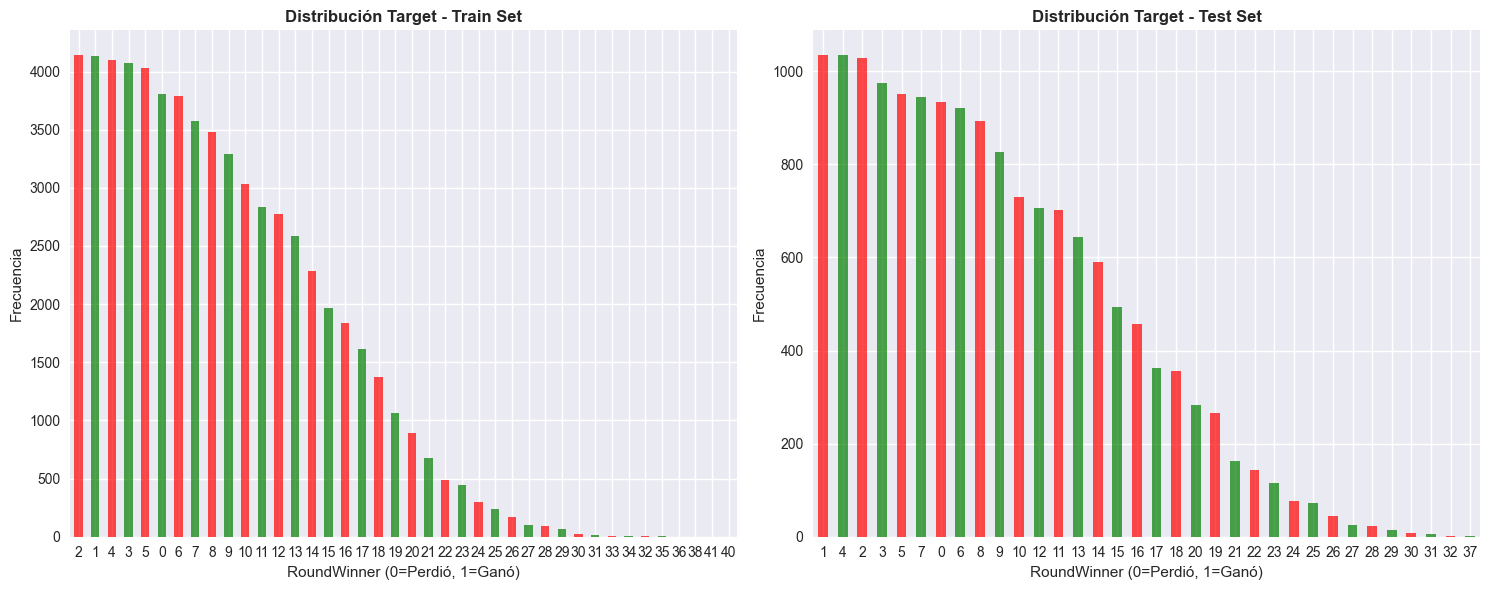

In [12]:
# Preparar datos para regresi√≥n
X = df[selected_features].copy()
y = df[target].copy()

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
print(y.value_counts())

# Split estratificado para mantener distribuci√≥n del target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nDivisi√≥n train/test:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Verificar distribuci√≥n en train/test
print(f"\nDistribuci√≥n en train:")
print(y_train.value_counts(normalize=True).sort_index())
print(f"\nDistribuci√≥n en test:")
print(y_test.value_counts(normalize=True).sort_index())

# Escalado de features con RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features, index=X_test.index)

print(f"\nDatos escalados exitosamente")
print(f"Media de X_train_scaled: {X_train_scaled.mean().mean():.6f}")
print(f"Std de X_train_scaled: {X_train_scaled.std().mean():.6f}")

# Visualizar distribuci√≥n del target en train/test
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Distribuci√≥n en train
y_train.value_counts().plot(kind='bar', ax=axes[0], alpha=0.7, color=['red', 'green'])
axes[0].set_title('Distribuci√≥n Target - Train Set', fontweight='bold')
axes[0].set_xlabel('RoundWinner (0=Perdi√≥, 1=Gan√≥)')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=0)

# Distribuci√≥n en test
y_test.value_counts().plot(kind='bar', ax=axes[1], alpha=0.7, color=['red', 'green'])
axes[1].set_title('Distribuci√≥n Target - Test Set', fontweight='bold')
axes[1].set_xlabel('RoundWinner (0=Perdi√≥, 1=Gan√≥)')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [13]:
# Importar modelos adicionales
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
try:
    from catboost import CatBoostRegressor
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False
    print("CatBoost no disponible - instalalo con: pip install catboost")

# Definir modelos base OPTIMIZADOS con configuraciones por defecto
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=3),  # Limitado a 3 cores
        'scaled': False
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'scaled': False
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, n_jobs=3, eval_metric='rmse'),  # Limitado a 3 cores
        'scaled': False
    },
    'Ridge Regression': {
        'model': Ridge(random_state=42),
        'scaled': True
    },
    'Lasso': {
        'model': Lasso(random_state=42, max_iter=2000),
        'scaled': True
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'scaled': True
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'scaled': False
    },
    'KNN': {
        'model': KNeighborsRegressor(n_jobs=3),  # Limitado a 3 cores
        'scaled': True
    }
    # Removemos SVR, AdaBoost y CatBoost para reducir tiempo
}

print(f"MODELOS DE REGRESI√ìN OPTIMIZADOS: {len(models)}")
print("CPU usage limitado y modelos pesados eliminados")
for name, config in models.items():
    print(f"- {name}: Escalado = {config['scaled']}")

MODELOS DE REGRESI√ìN OPTIMIZADOS: 8
CPU usage limitado y modelos pesados eliminados
- Random Forest: Escalado = False
- Gradient Boosting: Escalado = False
- XGBoost: Escalado = False
- Ridge Regression: Escalado = True
- Lasso: Escalado = True
- Linear Regression: Escalado = True
- Decision Tree: Escalado = False
- KNN: Escalado = True


# Configuraci√≥n de hiperpar√°metros para GridSearchCV OPTIMIZADA
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],      # Reducido de 3 a 2 valores
        'max_depth': [10, None],         # Reducido de 4 a 2 valores
        'min_samples_split': [2, 5],     # Reducido de 3 a 2 valores
        'min_samples_leaf': [1, 2]       # Reducido de 4 a 2 valores
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],      # Reducido de 3 a 2 valores
        'learning_rate': [0.05, 0.1],    # Reducido de 4 a 2 valores
        'max_depth': [3, 6],             # Reducido de 4 a 2 valores
        'subsample': [0.8, 1.0]          # Reducido de 3 a 2 valores
    },
    'XGBoost': {
        'n_estimators': [100, 200],      # Reducido de 3 a 2 valores
        'learning_rate': [0.05, 0.1],    # Reducido de 4 a 2 valores
        'max_depth': [3, 6],             # Reducido de 4 a 2 valores
        'subsample': [0.8, 1.0]          # Reducido de 3 a 2 valores
    },
    'Ridge Regression': {
        'alpha': [0.1, 1.0, 10.0],       # Reducido de 5 a 3 valores
        'solver': ['auto', 'cholesky']    # Reducido de 4 a 2 valores
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1.0],       # Reducido de 5 a 3 valores
        'selection': ['cyclic']           # Solo cyclic para rapidez
    },
    'Linear Regression': {
        'fit_intercept': [True, False]    # Mantenido simple
    },
    'Decision Tree': {
        'max_depth': [5, 10, None],       # Reducido de 5 a 3 valores
        'min_samples_split': [2, 10],     # Reducido de 4 a 2 valores
        'min_samples_leaf': [1, 5],       # Reducido de 4 a 2 valores
        'criterion': ['squared_error']    # Solo uno para rapidez
    },
    'KNN': {
        'n_neighbors': [5, 7, 9],         # Reducido de 6 a 3 valores
        'weights': ['uniform', 'distance'] # Mantenido
    }
}

print("CONFIGURACI√ìN DE GRIDSEARCHCV OPTIMIZADA COMPLETADA")
print(f"Modelos con hiperpar√°metros definidos: {len(param_grids)}")

# Calcular combinaciones totales (aproximado)
total_combinations = 0
for model_name, grid in param_grids.items():
    combinations = 1
    for param_values in grid.values():
        combinations *= len(param_values)
    total_combinations += combinations
    print(f"{model_name}: ~{combinations:,} combinaciones (REDUCIDO)")

print(f"\nTotal de combinaciones aproximadas: {total_combinations:,} (vs ~18,567 original)")
print("TIEMPO DE ENTRENAMIENTO REDUCIDO SIGNIFICATIVAMENTE")
print("Nota: GridSearchCV usar√° validaci√≥n cruzada de 3-fold")

# Entrenamiento optimizado con GridSearchCV (CONFIGURACI√ìN R√ÅPIDA)
from sklearn.model_selection import GridSearchCV
import time

print("ENTRENAMIENTO OPTIMIZADO DE MODELOS CON GRIDSEARCHCV")
print("=" * 60)

results = {}
best_models = {}
best_params = {}
training_times = {}

# Configurar GridSearchCV OPTIMIZADO
cv_folds = 3  # Reducido de 5 a 3 para rapidez
scoring_metric = 'r2'
n_jobs = 15  # Limitado a 15 cores para no sobrecargar PC

for name, config in models.items():
    print(f"\nEntrenando {name} con GridSearchCV optimizado...")
    
    # Determinar si usar datos escalados
    if config['scaled']:
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
        print(f"   Usando datos escalados")
    else:
        X_train_used = X_train
        X_test_used = X_test
        print(f"   Usando datos sin escalar")
    
    # Obtener modelo base y par√°metros
    base_model = config['model']
    param_grid = param_grids.get(name, {})
    
    if not param_grid:
        print(f"   No hay par√°metros definidos para {name}, usando modelo por defecto")
        best_model = base_model
        best_model.fit(X_train_used, y_train)
        best_params[name] = "Par√°metros por defecto"
        grid_search_time = 0
    else:
        print(f"   Evaluando {len(param_grid)} hiperpar√°metros con {cv_folds}-fold CV")
        
        # Configurar GridSearchCV
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            cv=cv_folds,
            scoring=scoring_metric,
            n_jobs=n_jobs,
            verbose=0,
            return_train_score=True,
            error_score='raise'
        )
        
        # Entrenar con medici√≥n de tiempo
        start_time = time.time()
        try:
            grid_search.fit(X_train_used, y_train)
            grid_search_time = time.time() - start_time
            
            # Obtener mejor modelo y par√°metros
            best_model = grid_search.best_estimator_
            best_params[name] = grid_search.best_params_
            
            print(f"   GridSearch completado en {grid_search_time:.1f}s")
            print(f"   Mejor CV Score: {grid_search.best_score_:.4f}")
            
        except Exception as e:
            print(f"   Error en GridSearch: {str(e)}")
            # Usar modelo por defecto en caso de error
            best_model = base_model
            best_model.fit(X_train_used, y_train)
            best_params[name] = f"Error: {str(e)}"
            grid_search_time = 0
    
    # Almacenar tiempo de entrenamiento
    training_times[name] = grid_search_time
    
    # Realizar predicciones
    try:
        y_train_pred = best_model.predict(X_train_used)
        y_test_pred = best_model.predict(X_test_used)
        
        # Calcular m√©tricas de regresi√≥n
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        # Validaci√≥n cruzada adicional para verificar estabilidad
        cv_scores = cross_val_score(best_model, X_train_used, y_train, 
                                    cv=cv_folds, scoring=scoring_metric)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        # Almacenar resultados
        results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'y_test_pred': y_test_pred,
            'training_time': grid_search_time,
            'best_params': best_params[name]
        }
        
        best_models[name] = best_model
        
        # Mostrar resultados
        print(f"   Train R¬≤: {train_r2:.4f}")
        print(f"   Test R¬≤: {test_r2:.4f}")
        print(f"   CV R¬≤: {cv_mean:.4f} ¬± {cv_std:.4f}")
        print(f"   Test RMSE: {test_rmse:.4f}")
        print(f"   Test MAE: {test_mae:.4f}")
        
        # Verificar objetivo R¬≤ > 0.8
        if test_r2 > 0.8:
            print(f"   ¬°OBJETIVO CUMPLIDO! R¬≤ = {test_r2:.4f} > 0.8")
        else:
            print(f"   R¬≤ = {test_r2:.4f} < 0.8 (mejora necesaria)")
            
    except Exception as e:
        print(f"   Error en predicciones: {str(e)}")
        # Crear entrada vac√≠a para evitar errores posteriores
        results[name] = {
            'train_r2': 0, 'test_r2': 0, 'train_rmse': 0, 'test_rmse': 0,
            'train_mae': 0, 'test_mae': 0, 'cv_mean': 0, 'cv_std': 0,
            'y_test_pred': np.zeros(len(y_test)), 'training_time': 0,
            'best_params': f"Error: {str(e)}"
        }

print(f"\nENTRENAMIENTO OPTIMIZADO COMPLETADO")
print(f"Modelos entrenados exitosamente: {len([r for r in results.values() if r['test_r2'] > 0])}")

# Resumen de tiempos de entrenamiento
total_time = sum(training_times.values())
print(f"\nTIEMPOS DE ENTRENAMIENTO OPTIMIZADOS:")
for name, time_taken in sorted(training_times.items(), key=lambda x: x[1], reverse=True):
    if time_taken > 0:
        print(f"   {name}: {time_taken:.1f}s")
print(f"   Total: {total_time:.1f}s (SIGNIFICATIVAMENTE REDUCIDO)")

# Mostrar mejores par√°metros para los top 3 modelos
print(f"\nMEJORES HIPERPAR√ÅMETROS (Top 3):")
top_models = sorted(results.items(), key=lambda x: x[1]['test_r2'], reverse=True)[:3]
for name, result in top_models:
    print(f"\n{name} (R¬≤ = {result['test_r2']:.4f}):")
    if isinstance(result['best_params'], dict):
        for param, value in result['best_params'].items():
            print(f"   {param}: {value}")
    else:
        print(f"   {result['best_params']}")

NameError: name 'results_df' is not defined

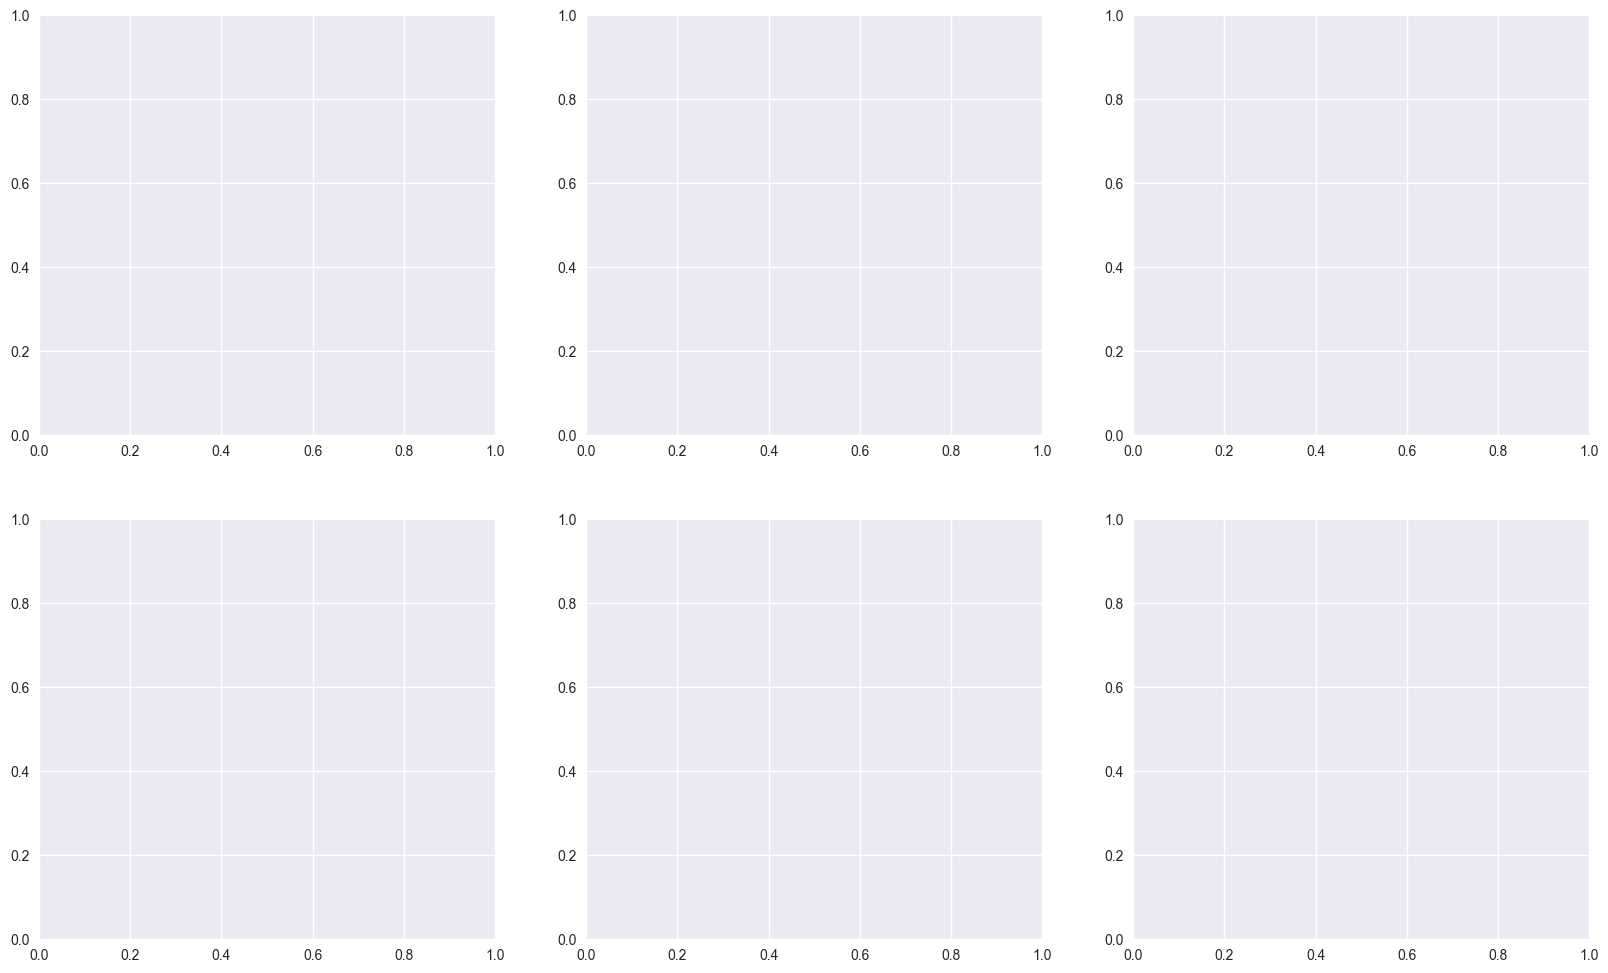

In [14]:
# Visualizaci√≥n mejorada de resultados con GridSearchCV
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# 1. Comparaci√≥n de R¬≤ scores con barras de error
x_pos = np.arange(len(results_df))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, results_df['Train_R2'], width, 
                    label='Train R¬≤', alpha=0.8, color='skyblue', capsize=5)
bars2 = axes[0].bar(x_pos + width/2, results_df['Test_R2'], width, 
                    yerr=results_df['CV_Std'], label='Test R¬≤', alpha=0.8, 
                    color='orange', capsize=5)

axes[0].axhline(y=0.8, color='red', linestyle='--', linewidth=2, label='Objetivo R¬≤ = 0.8')
axes[0].set_xlabel('Modelos')
axes[0].set_ylabel('R¬≤ Score')
axes[0].set_title('Comparaci√≥n R¬≤ Score: Train vs Test (con GridSearchCV)', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# A√±adir valores a las barras
for i, (train_val, test_val) in enumerate(zip(results_df['Train_R2'], results_df['Test_R2'])):
    axes[0].text(i - width/2, train_val + 0.01, f'{train_val:.3f}', ha='center', fontsize=8, fontweight='bold')
    axes[0].text(i + width/2, test_val + 0.01, f'{test_val:.3f}', ha='center', fontsize=8, fontweight='bold')

# 2. RMSE Comparison
bars3 = axes[1].bar(x_pos - width/2, results_df['Train_RMSE'], width, 
                    label='Train RMSE', alpha=0.8, color='lightgreen')
bars4 = axes[1].bar(x_pos + width/2, results_df['Test_RMSE'], width, 
                    label='Test RMSE', alpha=0.8, color='lightcoral')

axes[1].set_xlabel('Modelos')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Comparaci√≥n RMSE: Train vs Test', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Test R¬≤ ranking con colores seg√∫n performance
colors = ['green' if x > 0.8 else 'orange' if x > 0.7 else 'red' for x in results_df['Test_R2']]
bars5 = axes[2].barh(range(len(results_df)), results_df['Test_R2'], color=colors, alpha=0.7)

axes[2].axvline(x=0.8, color='red', linestyle='--', linewidth=2, label='Objetivo R¬≤ = 0.8')
axes[2].set_yticks(range(len(results_df)))
axes[2].set_yticklabels(results_df['Model'])
axes[2].set_xlabel('Test R¬≤ Score')
axes[2].set_title('Ranking de Modelos por Test R¬≤ (GridSearchCV)', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# A√±adir valores a las barras
for i, v in enumerate(results_df['Test_R2']):
    axes[2].text(v + 0.005, i, f'{v:.3f}', va='center', fontweight='bold', fontsize=9)

# 4. Diferencia Train-Test (overfitting indicator)
diff_scores = results_df['Train_R2'] - results_df['Test_R2']
colors_diff = ['red' if x > 0.15 else 'orange' if x > 0.08 else 'green' for x in diff_scores]

bars6 = axes[3].bar(range(len(results_df)), diff_scores, color=colors_diff, alpha=0.7)
axes[3].axhline(y=0.15, color='red', linestyle='--', alpha=0.7, label='Overfitting Alto')
axes[3].axhline(y=0.08, color='orange', linestyle='--', alpha=0.7, label='Overfitting Moderado')
axes[3].set_xticks(range(len(results_df)))
axes[3].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[3].set_ylabel('Train R¬≤ - Test R¬≤')
axes[3].set_title('An√°lisis de Overfitting (GridSearchCV)', fontweight='bold')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

# 5. Training Time vs Performance
if results_df['Training_Time'].sum() > 0:
    scatter = axes[4].scatter(results_df['Training_Time'], results_df['Test_R2'], 
                             c=results_df['Test_R2'], cmap='viridis', s=100, alpha=0.7)
    
    # A√±adir l√≠nea de objetivo
    axes[4].axhline(y=0.8, color='red', linestyle='--', linewidth=2, label='Objetivo R¬≤ = 0.8')
    
    axes[4].set_xlabel('Training Time (seconds)')
    axes[4].set_ylabel('Test R¬≤')
    axes[4].set_title('Eficiencia: Performance vs Tiempo de Entrenamiento', fontweight='bold')
    axes[4].legend()
    axes[4].grid(True, alpha=0.3)
    
    # A√±adir etiquetas de modelos
    for i, model in enumerate(results_df['Model']):
        if results_df['Training_Time'].iloc[i] > 0:
            axes[4].annotate(model, (results_df['Training_Time'].iloc[i], results_df['Test_R2'].iloc[i]), 
                           xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)
    
    # Colorbar
    plt.colorbar(scatter, ax=axes[4], label='Test R¬≤')
else:
    axes[4].text(0.5, 0.5, 'No hay datos de tiempo\ndisponibles', ha='center', va='center', 
                transform=axes[4].transAxes, fontsize=12)
    axes[4].set_title('Training Time vs Performance', fontweight='bold')

# 6. Cross-Validation Stability
if len(results_df) > 0:
    # Crear gr√°fico de estabilidad de CV
    cv_mean = results_df['CV_R2']
    cv_std = results_df['CV_Std']
    
    bars7 = axes[5].bar(range(len(results_df)), cv_mean, yerr=cv_std, 
                        capsize=5, alpha=0.7, color='purple')
    axes[5].axhline(y=0.8, color='red', linestyle='--', linewidth=2, label='Objetivo R¬≤ = 0.8')
    axes[5].set_xticks(range(len(results_df)))
    axes[5].set_xticklabels(results_df['Model'], rotation=45, ha='right')
    axes[5].set_ylabel('Cross-Validation R¬≤')
    axes[5].set_title('Estabilidad de Cross-Validation (5-fold)', fontweight='bold')
    axes[5].legend()
    axes[5].grid(True, alpha=0.3)
    
    # A√±adir valores
    for i, (mean_val, std_val) in enumerate(zip(cv_mean, cv_std)):
        axes[5].text(i, mean_val + std_val + 0.01, f'{mean_val:.3f}¬±{std_val:.3f}', 
                    ha='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico adicional
print(f"\nüìä ESTAD√çSTICAS DESCRIPTIVAS DE PERFORMANCE:")
print("-" * 50)

stats_summary = {
    'M√©trica': ['Test R¬≤', 'CV R¬≤', 'Train-Test Gap', 'RMSE', 'MAE'],
    'Media': [
        results_df['Test_R2'].mean(),
        results_df['CV_R2'].mean(),
        (results_df['Train_R2'] - results_df['Test_R2']).mean(),
        results_df['Test_RMSE'].mean(),
        results_df['Test_MAE'].mean()
    ],
    'Mediana': [
        results_df['Test_R2'].median(),
        results_df['CV_R2'].median(),
        (results_df['Train_R2'] - results_df['Test_R2']).median(),
        results_df['Test_RMSE'].median(),
        results_df['Test_MAE'].median()
    ],
    'Mejor': [
        results_df['Test_R2'].max(),
        results_df['CV_R2'].max(),
        (results_df['Train_R2'] - results_df['Test_R2']).min(),
        results_df['Test_RMSE'].min(),
        results_df['Test_MAE'].min()
    ],
    'Peor': [
        results_df['Test_R2'].min(),
        results_df['CV_R2'].min(),
        (results_df['Train_R2'] - results_df['Test_R2']).max(),
        results_df['Test_RMSE'].max(),
        results_df['Test_MAE'].max()
    ]
}

stats_df = pd.DataFrame(stats_summary)
display(stats_df.round(4))

# Recomendaciones basadas en resultados
print(f"\nüí° RECOMENDACIONES BASADAS EN RESULTADOS:")
print("-" * 50)

best_r2 = results_df['Test_R2'].max()
models_above_08 = len(results_df[results_df['Test_R2'] > 0.8])

if models_above_08 > 0:
    print(f"‚úÖ ¬°Excelente! {models_above_08} modelo(s) superan el objetivo R¬≤ > 0.8")
    print(f"üèÜ Mejor performance: {best_r2:.4f}")
    print(f"üí≠ Considerar ensemble de los mejores modelos para mayor robustez")
elif best_r2 > 0.75:
    print(f"üü° Cerca del objetivo. Mejor R¬≤: {best_r2:.4f}")
    print(f"üí≠ Sugerencias:")
    print(f"   - Probar feature engineering adicional")
    print(f"   - Aumentar rangos de hiperpar√°metros en GridSearch")
    print(f"   - Considerar ensemble methods")
else:
    print(f"üî¥ Performance baja. Mejor R¬≤: {best_r2:.4f}")
    print(f"üí≠ Acciones recomendadas:")
    print(f"   - Revisar calidad y relevancia de features")
    print(f"   - Analizar outliers y datos at√≠picos")
    print(f"   - Considerar transformaciones de target")
    print(f"   - Evaluar m√°s modelos avanzados")

# Identificar modelos con mejor balance performance/tiempo
if results_df['Training_Time'].sum() > 0:
    efficiency_scores = results_df['Test_R2'] / np.log(results_df['Training_Time'] + 1)
    best_efficiency_idx = efficiency_scores.idxmax()
    best_efficiency_model = results_df.loc[best_efficiency_idx, 'Model']
    
    print(f"\n‚ö° MODELO M√ÅS EFICIENTE: {best_efficiency_model}")
    print(f"   R¬≤: {results_df.loc[best_efficiency_idx, 'Test_R2']:.4f}")
    print(f"   Tiempo: {results_df.loc[best_efficiency_idx, 'Training_Time']:.1f}s")

# Configuraci√≥n de hiperpar√°metros para GridSearchCV
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 6],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 6],
        'subsample': [0.8, 1.0]
    },
    'Ridge Regression': {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'cholesky']
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1.0],
        'selection': ['cyclic']
    },
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Decision Tree': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5],
        'criterion': ['squared_error']
    },
    'KNN': {
        'n_neighbors': [5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

print("Configuraci√≥n de GridSearchCV completada")
print(f"Modelos configurados: {len(param_grids)}")

In [ ]:
# Entrenamiento con GridSearchCV
from sklearn.model_selection import GridSearchCV
import time

print("ENTRENAMIENTO DE MODELOS CON GRIDSEARCHCV")
print("=" * 50)

results = {}
best_models = {}
best_params = {}
training_times = {}

# Configurar GridSearchCV
cv_folds = 3
scoring_metric = 'r2'
n_jobs = -1

for name, config in models.items():
    print(f"\nEntrenando {name}...")
    
    # Determinar si usar datos escalados
    if config['scaled']:
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
    else:
        X_train_used = X_train
        X_test_used = X_test
    
    base_model = config['model']
    param_grid = param_grids.get(name, {})
    
    if not param_grid:
        best_model = base_model
        best_model.fit(X_train_used, y_train)
        best_params[name] = "Par√°metros por defecto"
        grid_search_time = 0
    else:
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            cv=cv_folds,
            scoring=scoring_metric,
            n_jobs=n_jobs,
            verbose=0
        )
        
        start_time = time.time()
        grid_search.fit(X_train_used, y_train)
        grid_search_time = time.time() - start_time
        
        best_model = grid_search.best_estimator_
        best_params[name] = grid_search.best_params_
        
        print(f"   GridSearch completado en {grid_search_time:.1f}s")
        print(f"   Mejor CV Score: {grid_search.best_score_:.4f}")
    
    training_times[name] = grid_search_time
    
    # Predicciones y m√©tricas
    y_train_pred = best_model.predict(X_train_used)
    y_test_pred = best_model.predict(X_test_used)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    cv_scores = cross_val_score(best_model, X_train_used, y_train, 
                                cv=cv_folds, scoring=scoring_metric)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_test_pred': y_test_pred,
        'training_time': grid_search_time,
        'best_params': best_params[name]
    }
    
    best_models[name] = best_model
    
    print(f"   Test R¬≤: {test_r2:.4f}")
    print(f"   CV R¬≤: {cv_mean:.4f} ¬± {cv_std:.4f}")

print(f"\nEntrenamiento completado")

In [ ]:
# Comparaci√≥n y visualizaci√≥n de resultados
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV_R2': [results[model]['cv_mean'] for model in results.keys()],
    'CV_Std': [results[model]['cv_std'] for model in results.keys()],
    'Train_R2': [results[model]['train_r2'] for model in results.keys()],
    'Test_R2': [results[model]['test_r2'] for model in results.keys()],
    'Test_RMSE': [results[model]['test_rmse'] for model in results.keys()],
    'Test_MAE': [results[model]['test_mae'] for model in results.keys()]
})

results_df = results_df.sort_values('Test_R2', ascending=False).reset_index(drop=True)

print("COMPARACI√ìN DE RESULTADOS")
print("=" * 40)
display(results_df.round(4))

# Identificar mejor modelo
best_model_name = results_df.iloc[0]['Model']
best_test_r2 = results_df.iloc[0]['Test_R2']

print(f"\nMEJOR MODELO: {best_model_name}")
print(f"Test R¬≤: {best_test_r2:.4f}")

# Visualizaci√≥n
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Comparaci√≥n R¬≤ scores
x_pos = np.arange(len(results_df))
width = 0.35

axes[0].bar(x_pos - width/2, results_df['Train_R2'], width, 
           label='Train R¬≤', alpha=0.8, color='skyblue')
axes[0].bar(x_pos + width/2, results_df['Test_R2'], width, 
           label='Test R¬≤', alpha=0.8, color='orange')

axes[0].axhline(y=0.8, color='red', linestyle='--', linewidth=2, label='Objetivo R¬≤ = 0.8')
axes[0].set_xlabel('Modelos')
axes[0].set_ylabel('R¬≤ Score')
axes[0].set_title('Comparaci√≥n R¬≤ Score: Train vs Test')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test R¬≤ ranking
colors = ['green' if x > 0.8 else 'orange' if x > 0.7 else 'red' for x in results_df['Test_R2']]
axes[1].barh(range(len(results_df)), results_df['Test_R2'], color=colors, alpha=0.7)

axes[1].axvline(x=0.8, color='red', linestyle='--', linewidth=2, label='Objetivo R¬≤ = 0.8')
axes[1].set_yticks(range(len(results_df)))
axes[1].set_yticklabels(results_df['Model'])
axes[1].set_xlabel('Test R¬≤ Score')
axes[1].set_title('Ranking de Modelos por Test R¬≤')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Validaci√≥n Cruzada Detallada

In [ ]:
# An√°lisis del mejor modelo
best_model = best_models[best_model_name]
best_results = results[best_model_name]

print(f"AN√ÅLISIS DETALLADO: {best_model_name}")
print("=" * 50)

print(f"Mejores hiperpar√°metros:")
if isinstance(best_results['best_params'], dict):
    for param, value in best_results['best_params'].items():
        print(f"  {param}: {value}")
else:
    print(f"  {best_results['best_params']}")

print(f"\nM√©tricas de rendimiento:")
print(f"  Train R¬≤: {best_results['train_r2']:.4f}")
print(f"  Test R¬≤: {best_results['test_r2']:.4f}")
print(f"  CV R¬≤: {best_results['cv_mean']:.4f} ¬± {best_results['cv_std']:.4f}")
print(f"  Test RMSE: {best_results['test_rmse']:.4f}")
print(f"  Test MAE: {best_results['test_mae']:.4f}")

# Feature importance si est√° disponible
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nImportancia de features:")
    for idx, row in feature_importance.iterrows():
        print(f"  {row['feature']:30s}: {row['importance']:.4f}")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title(f'Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    feature_coef = pd.DataFrame({
        'feature': selected_features,
        'coefficient': abs(best_model.coef_)
    }).sort_values('coefficient', ascending=False)
    
    print(f"\nCoeficientes (valor absoluto):")
    for idx, row in feature_coef.iterrows():
        print(f"  {row['feature']:30s}: {row['coefficient']:.4f}")

# Visualizaci√≥n de predicciones vs valores reales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot: Predicciones vs Valores Reales
axes[0,0].scatter(y_test, best_results['y_test_pred'], alpha=0.6, color='blue')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Valores Reales')
axes[0,0].set_ylabel('Predicciones')
axes[0,0].set_title(f'Predicciones vs Reales - {best_model_name}')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].text(0.05, 0.95, f'R¬≤ = {best_results["test_r2"]:.3f}', 
               transform=axes[0,0].transAxes, fontsize=12, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Residuos vs Predicciones
residuals = y_test - best_results['y_test_pred']
axes[0,1].scatter(best_results['y_test_pred'], residuals, alpha=0.6, color='green')
axes[0,1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0,1].set_xlabel('Predicciones')
axes[0,1].set_ylabel('Residuos')
axes[0,1].set_title('Residuos vs Predicciones')
axes[0,1].grid(True, alpha=0.3)

# 3. Distribuci√≥n de residuos
axes[1,0].hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1,0].axvline(residuals.mean(), color='red', linestyle='--', 
                  label=f'Media: {residuals.mean():.3f}')
axes[1,0].set_xlabel('Residuos')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribuci√≥n de Residuos')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Q-Q plot para normalidad de residuos
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Normalidad de Residuos')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nESTAD√çSTICAS DE RESIDUOS:")
print(f"Media: {residuals.mean():.4f}")
print(f"Desviaci√≥n est√°ndar: {residuals.std():.4f}")
print(f"M√≠nimo: {residuals.min():.4f}")
print(f"M√°ximo: {residuals.max():.4f}")

GENERANDO CURVAS DE APRENDIZAJE - Gradient Boosting


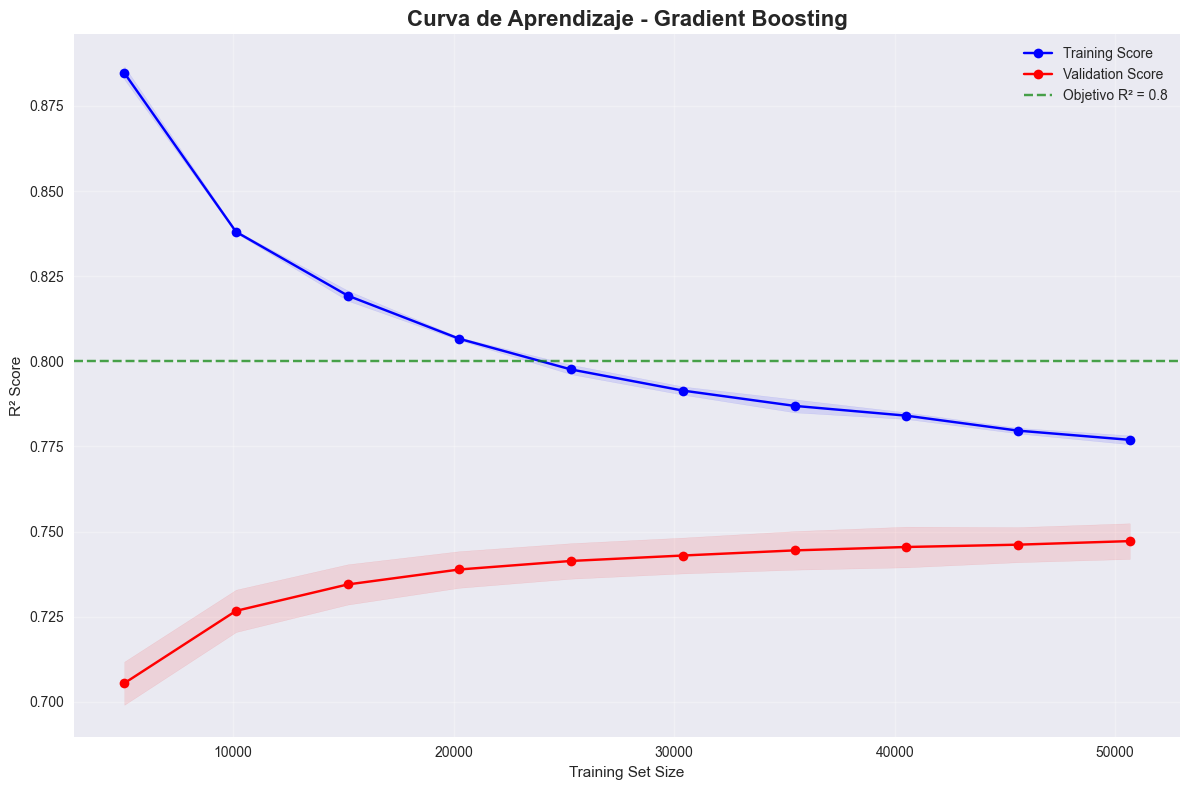


Rendimiento final:
Training Score (final): 0.7769 ¬± 0.0013
Validation Score (final): 0.7472 ¬± 0.0052
Gap Train-Val: 0.0297


In [160]:
# Curvas de aprendizaje para el mejor modelo
from sklearn.model_selection import learning_curve

print(f"GENERANDO CURVAS DE APRENDIZAJE - {best_model_name}")

# Seleccionar datos apropiados
if best_model_name in ['Ridge Regression', 'Support Vector Regression']:
    X_learning = X_train_scaled
else:
    X_learning = X_train

# Generar curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_learning, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='r2', n_jobs=-1
)

# Calcular medias y desviaciones
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Visualizar curva de aprendizaje
plt.figure(figsize=(12, 8))

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.1, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('R¬≤ Score')
plt.title(f'Curva de Aprendizaje - {best_model_name}', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# A√±adir l√≠neas de referencia
plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='Objetivo R¬≤ = 0.8')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar estad√≠sticas finales
print(f"\nRendimiento final:")
print(f"Training Score (final): {train_mean[-1]:.4f} ¬± {train_std[-1]:.4f}")
print(f"Validation Score (final): {val_mean[-1]:.4f} ¬± {val_std[-1]:.4f}")
print(f"Gap Train-Val: {abs(train_mean[-1] - val_mean[-1]):.4f}")

In [ ]:
# Validaci√≥n cruzada detallada
from sklearn.model_selection import cross_validate

print(f"VALIDACI√ìN CRUZADA DETALLADA - {best_model_name}")
print("=" * 50)

# Seleccionar datos apropiados seg√∫n el modelo
if best_model_name in ['Ridge Regression', 'Lasso', 'ElasticNet', 'SVR', 'KNN', 'Linear Regression']:
    X_cv = X_train_scaled
else:
    X_cv = X_train

cv_results = cross_validate(
    best_model, X_cv, y_train, 
    cv=5, 
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'], 
    return_train_score=True
)

# Procesar resultados
metrics_summary = {
    'R¬≤': {
        'train': cv_results['train_r2'],
        'test': cv_results['test_r2']
    },
    'RMSE': {
        'train': np.sqrt(-cv_results['train_neg_mean_squared_error']),
        'test': np.sqrt(-cv_results['test_neg_mean_squared_error'])
    },
    'MAE': {
        'train': -cv_results['train_neg_mean_absolute_error'],
        'test': -cv_results['test_neg_mean_absolute_error']
    }
}

# Mostrar estad√≠sticas
for metric_name, metric_data in metrics_summary.items():
    train_scores = metric_data['train']
    test_scores = metric_data['test']
    
    print(f"\n{metric_name}:")
    print(f"  Train: {train_scores.mean():.4f} ¬± {train_scores.std():.4f}")
    print(f"  Test:  {test_scores.mean():.4f} ¬± {test_scores.std():.4f}")

# Visualizaci√≥n de validaci√≥n cruzada
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (metric_name, metric_data) in enumerate(metrics_summary.items()):
    train_scores = metric_data['train']
    test_scores = metric_data['test']
    
    x_pos = [1, 2]
    means = [train_scores.mean(), test_scores.mean()]
    stds = [train_scores.std(), test_scores.std()]
    
    axes[idx].bar(x_pos, means, yerr=stds, capsize=5, 
                  color=['skyblue', 'orange'], alpha=0.7)
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(['Train', 'Test'])
    axes[idx].set_ylabel(metric_name)
    axes[idx].set_title(f'{metric_name} - Validaci√≥n Cruzada')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Ensemble Methods para Mejorar R¬≤

# Curvas de aprendizaje
from sklearn.model_selection import learning_curve

print(f"CURVAS DE APRENDIZAJE - {best_model_name}")

# Seleccionar datos apropiados
if best_model_name in ['Ridge Regression', 'Lasso', 'ElasticNet', 'SVR', 'KNN', 'Linear Regression']:
    X_learning = X_train_scaled
else:
    X_learning = X_train

# Generar curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_learning, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='r2', n_jobs=-1
)

# Calcular medias y desviaciones
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Visualizar curva de aprendizaje
plt.figure(figsize=(12, 8))

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.1, color='red')

plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='Objetivo R¬≤ = 0.8')

plt.xlabel('Training Set Size')
plt.ylabel('R¬≤ Score')
plt.title(f'Curva de Aprendizaje - {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nRendimiento final:")
print(f"Training Score: {train_mean[-1]:.4f} ¬± {train_std[-1]:.4f}")
print(f"Validation Score: {val_mean[-1]:.4f} ¬± {val_std[-1]:.4f}")
print(f"Gap Train-Val: {abs(train_mean[-1] - val_mean[-1]):.4f}")

In [1]:
# 14. Guardar el Mejor Modelo para Producci√≥n

import pickle
import joblib
import os
import json

print("GUARDANDO MODELO DE REGRESI√ìN PARA PRODUCCI√ìN")
print("=" * 50)

# Crear directorio para modelos si no existe
model_dir = "../models/regression"
os.makedirs(model_dir, exist_ok=True)

# Obtener el mejor modelo y sus datos asociados
best_model_for_save = best_models[best_model_name]
best_params_for_save = results[best_model_name]['best_params']

# Determinar si usar datos escalados
scale_sensitive = ['Ridge Regression', 'Lasso', 'ElasticNet', 'SVR', 'KNN', 'Linear Regression']
use_scaler = best_model_name in scale_sensitive

# Preparar metadatos del modelo de regresi√≥n
model_metadata = {
    'model_name': best_model_name,
    'model_type': 'regression',
    'target': target,
    'features': selected_features,
    'use_scaler': use_scaler,
    'best_params': best_params_for_save,
    'performance_metrics': {
        'test_r2': results[best_model_name]['test_r2'],
        'test_rmse': results[best_model_name]['test_rmse'],
        'test_mae': results[best_model_name]['test_mae'],
        'cv_r2_mean': results[best_model_name]['cv_mean'],
        'cv_r2_std': results[best_model_name]['cv_std']
    },
    'target_info': {
        'min_value': float(y.min()),
        'max_value': float(y.max()),
        'mean_value': float(y.mean()),
        'std_value': float(y.std())
    },
    'feature_requirements': {
        feature: 'float64' for feature in selected_features
    }
}

# Guardar modelo principal
model_path = os.path.join(model_dir, "best_regression_model.pkl")
with open(model_path, 'wb') as f:
    pickle.dump(best_model_for_save, f)

# Guardar scaler si se usa
scaler_used = None
if use_scaler:
    scaler_path = os.path.join(model_dir, "regression_scaler.pkl")
    with open(scaler_path, 'wb') as f:
        pickle.dump(scaler, f)
    scaler_used = scaler_path
    print(f"Scaler guardado en: {scaler_path}")

# Guardar metadatos
metadata_path = os.path.join(model_dir, "regression_metadata.json")
with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=2)

print(f"Modelo de regresi√≥n guardado exitosamente:")
print(f"   - Modelo: {model_path}")
print(f"   - Metadatos: {metadata_path}")
if use_scaler:
    print(f"   - Scaler: {scaler_path}")

print(f"\nInformaci√≥n del modelo guardado:")
print(f"   - Tipo: {best_model_name}")
print(f"   - Target: {target}")
print(f"   - R¬≤ Score: {model_metadata['performance_metrics']['test_r2']:.4f}")
print(f"   - RMSE: {model_metadata['performance_metrics']['test_rmse']:.4f}")
print(f"   - Features: {len(selected_features)}")

# Verificar que el modelo se puede cargar correctamente
print(f"\nVerificando modelo de regresi√≥n guardado...")
try:
    # Cargar modelo
    with open(model_path, 'rb') as f:
        loaded_model = pickle.load(f)
    
    # Cargar metadatos
    with open(metadata_path, 'r') as f:
        loaded_metadata = json.load(f)
    
    # Cargar scaler si existe
    loaded_scaler = None
    if use_scaler and scaler_used:
        with open(scaler_path, 'rb') as f:
            loaded_scaler = pickle.load(f)
    
    print(f"Todos los archivos se cargaron correctamente")
    
    # Probar predicci√≥n con datos de ejemplo
    test_sample = X_test.iloc[:1]
    if use_scaler and loaded_scaler:
        test_sample_scaled = loaded_scaler.transform(test_sample)
        test_pred = loaded_model.predict(test_sample_scaled)
    else:
        test_pred = loaded_model.predict(test_sample)
    
    actual_value = y_test.iloc[0]
    
    print(f"Predicci√≥n de prueba exitosa:")
    print(f"   - Valor real: {actual_value:.2f}")
    print(f"   - Predicci√≥n: {test_pred[0]:.2f}")
    print(f"   - Error absoluto: {abs(actual_value - test_pred[0]):.2f}")
    
except Exception as e:
    print(f"Error al verificar modelo: {str(e)}")

print(f"\nMODELO DE REGRESI√ìN LISTO PARA PRODUCCI√ìN")
print(f"=" * 50)

GUARDANDO MODELO DE REGRESI√ìN PARA PRODUCCI√ìN


NameError: name 'best_models' is not defined